##### Version 0.1

`Created by Olaf Behrendt 2020-04-28`

# Sampling of Non-symptomatic SARS-CoV-2 Individuals

## Summary

In order to conduct tests on a sample of non-symptomatic individuals, we would need a huge sample sizes. This observation is based on the fact that we have to assume only a small percentage of the population are non-symptomatic infected individuals. E.g. assuming that at the point of time of testing 

* 100.000 individuals are non-symptomatic infected with SARS-CoV-2 in Germany and 
* we accept an error of 30% (for a significance niveau of 95%) 

we end up with a minimal sample size of approximately 30,000.

## Model
<!--
Density of normal distribution
$$
\begin{align}
f(x\mid \mu ,\sigma^2)
  &= \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
   = \frac{1}{ \sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }
\end{align}
$$
-->

Our statistical model for sampling SARS-CoV-2 uses following random variable

$$
X_i = \left\{
  \begin{array}{lc}
    1 & \text{if test is positiv}\\
    0 & \text{otherwise}
  \end{array}
\right.
$$ 

where $X_i$ are independent Bernoulli distributed random variabels with expectation $\mu=p$ (the probability of beeing infected) and variance $\sigma^2=pq=p(1-p)$. The total number of infected individuals in a sample of size $n$ is given by the random variable 

$$X_n = \sum_{i=1}^n X_i.$$

The central limit theorem states that 

$$Z_n=\left(\frac{X_n-n\mu}{\sigma\sqrt n}\right) \xrightarrow[]{n\rightarrow\infty} \mathcal{N}(0,1),$$

where $\mu=E(X_i)$ and $\sigma=\sqrt{Var(X_i)}$. So in our case with $X_i$ beeing Bernoully distributed variables we have

$$
Z_n=\frac{X_n-np}{\sqrt{npq}}\sim\mathcal{N}(0,1).
$$

Then for a given signicance level $\alpha$ and quantiles $-z_\alpha, z_\alpha$ we get

$$
P(-z_\alpha\leq Z_n \leq z_\alpha) = 1 -\alpha.
$$

Let us further define a maximal error percentage $\delta_e$ we accept for $X_n-np$, where $np$ is the (unknown) true mean and $X_n$ our test statistic. For example if the (unknow) expectation for the number of infected is $1000$ we might accept an error of $\delta_e\cdot 1000$, e.g. $200$ for $\delta_e=20\%$. From above it follows that 

$$\begin{align*}
-z_\alpha \leq Z_n \Rightarrow -z_\alpha\sqrt{npq} &\leq X_n - np \leq \delta_e np\Rightarrow\\
-z_\alpha\sqrt{npq} &\stackrel{!}{\leq} \delta_e np \Rightarrow\\
-z_\alpha\sqrt{pq} &\leq \delta_e \sqrt{n}p \Rightarrow\\
n &\geq \frac{z_\alpha^2pq}{\delta_e^2p^2} = \frac{z_\alpha^2(1-p)}{\delta_e^2p}\approx \frac{z_\alpha^2}{\delta_e^2}p^{-1},\;\text{since $p$ is very small.}
\end{align*}$$

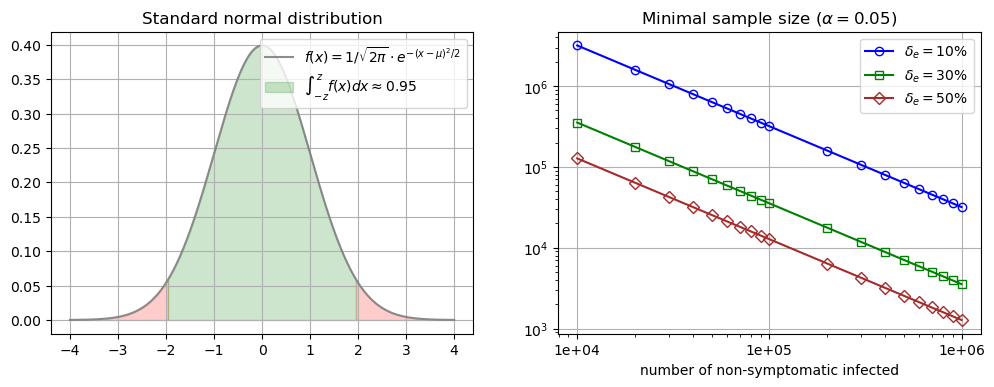

In [28]:
#%matplotlib inline
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

delta = 0.1                            # Max 10 percent error
alpha = 0.05                           # 95% significance
N     = 83e6                           # population size
#mu    = np.geomspace(2e4, 1e6, num=11) # array of assumed number of non-symptomatic infected
mu    = np.concatenate((np.linspace(1e4,1e5, num=10),np.linspace(2e5,1e6, num=9)) )
z     = norm.ppf(1-(alpha/2))    # alpha-quantile

print (  )
# calculates minimum sample size for given quantile z, error delta and assumed number of non-symptomatic infected mu
def sample_size(delta=0.10):
    return z**2/delta**2 * N/mu

x1 = np.arange(start=-4, stop=-z, step=0.01)
x2 = np.arange(start=-z, stop=z, step=0.01)
x3 = np.arange(start=z, stop=4, step=0.01)
y1 = norm.pdf(x1)
y2 = norm.pdf(x2)
y3 = norm.pdf(x3)

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12, 4), dpi=100)
col = ('black', 'green', 'red', 'grey', 'blue', 'brown')
ax[0].fill_between(x1, y1, 0, alpha=0.2, color=col[2])
ax[0].fill_between(x2, y2, 0, alpha=0.2, color=col[1], label="$\\int_{-z}^{z}f(x)dx\\approx %.2f$" % (1-alpha))
ax[0].fill_between(x3, y3, 0, alpha=0.2, color=col[2])
ax[0].plot(np.concatenate((x1,x2,x3)), np.concatenate((y1,y2,y3)), color=col[3], alpha=0.9, label='$f(x)=1/\\sqrt{2\pi}\cdot e^{-(x-\\mu)^2/2}$')
ax[0].set_title("Standard normal distribution")
ax[0].grid()
ax[0].legend(loc='upper right')

ax[1].set_title("Minimal sample size ($\\alpha=0.05$)")
ax[1].plot(mu, sample_size(0.1), marker='o', fillstyle='none', color=col[4], alpha=1.0, label="$\\delta_e=10\\%$")
ax[1].plot(mu, sample_size(0.3), marker='s', fillstyle='none', color=col[1], alpha=1.0, label="$\\delta_e=30\\%$")
ax[1].plot(mu, sample_size(0.5), marker='D', fillstyle='none', color=col[5], alpha=1.0, label="$\\delta_e=50\\%$")
ax[1].grid()
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('number of non-symptomatic infected')
ax[1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.show()